<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/mlp(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((train picture, train ans.), (test picture, tesyt ans.))
(x_train, y_train), (x_test, y_test) = load_data()

In [83]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,2,0,0,12,129,168,85,56,47,43,109,135,2,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,112,231,206,207,213,208,223,206,216,195,224,114,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,181,200,192,181,171,186,180,170,179,185,179,192,218,164,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,168,213,177,198,178,177,186,185,186,179,191,185,208,211,60,0,0,0,0,0,0
4,0,0,0,0,0,0,0,37,255,162,200,188,180,178,181,182,184,195,178,219,113,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,53,180,188,200,178,181,186,180,185,187,193,109,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,28,199,197,187,199,180,180,185,182,190,182,207,210,8,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,153,213,175,216,206,184,178,186,182,178,223,186,206,204,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,135,211,188,192,198,175,177,187,181,179,190,191,200,190,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,158,200,155,227,200,179,177,188,180,175,205,203,197,194,0,0,0,0,0,0,0


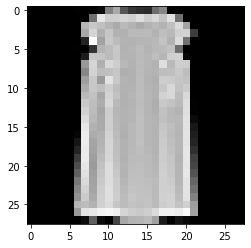

In [84]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
          # 28 * 28 = 784
          # 784 * 128 +128 = 100480
          Dense(256, activation="relu", input_dim = 784),
          # 128 * 10 = 1280 , 1280+10(bias)=1290
          Dense(10, activation="softmax")

]
model = Sequential(layers)
# param => layer 1 to layer 2 in all link and add bias number of layer 2
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [86]:
# x:scaling 0-255 => 0-1 farme is random
# y:one-hot encoding 10 Ans.
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [87]:
# binary cross entropy: p*log(1/q) + (1-p)*log(1/(1-q))
# categorical cross entropy: p1 * log(1/q1) + ...
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [88]:
# batch: 100~200(small picture) 10~20(large picture)
# epoch: how many adjustment with data
# 60000data, 2epoch, 200batch =>60000*2/200 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
      ModelCheckpoint("model.h5", save_best_only=True),
      EarlyStopping(patience=5, restore_best_weights=True)
      ]

model.fit(x_train_norm, y_train_cat, batch_size=100, epochs=20, validation_split=0.1, callbacks = callbacks, verbose=2)
# validation_split=
# verbose => cancel bar figure

Epoch 1/20
540/540 - 2s - loss: 0.5337 - accuracy: 0.8139 - val_loss: 0.4327 - val_accuracy: 0.8420
Epoch 2/20
540/540 - 2s - loss: 0.3902 - accuracy: 0.8610 - val_loss: 0.3765 - val_accuracy: 0.8642
Epoch 3/20
540/540 - 2s - loss: 0.3460 - accuracy: 0.8741 - val_loss: 0.3513 - val_accuracy: 0.8735
Epoch 4/20
540/540 - 2s - loss: 0.3198 - accuracy: 0.8839 - val_loss: 0.3437 - val_accuracy: 0.8705
Epoch 5/20
540/540 - 2s - loss: 0.2974 - accuracy: 0.8910 - val_loss: 0.3514 - val_accuracy: 0.8692
Epoch 6/20
540/540 - 2s - loss: 0.2829 - accuracy: 0.8973 - val_loss: 0.3192 - val_accuracy: 0.8815
Epoch 7/20
540/540 - 2s - loss: 0.2690 - accuracy: 0.9013 - val_loss: 0.3099 - val_accuracy: 0.8857
Epoch 8/20
540/540 - 2s - loss: 0.2573 - accuracy: 0.9044 - val_loss: 0.3138 - val_accuracy: 0.8852
Epoch 9/20
540/540 - 2s - loss: 0.2455 - accuracy: 0.9085 - val_loss: 0.3174 - val_accuracy: 0.8867
Epoch 10/20
540/540 - 2s - loss: 0.2381 - accuracy: 0.9113 - val_loss: 0.3110 - val_accuracy: 0.8912

540/540 - 
=> batch_size=100 => 60000/100 = 600；validation_split=0.1 => 600 * 0.1 = 60(keep data), train 540 data
1s - 
loss: 0.1611 - full down
accuracy: 0.9535 - full up(correct rate)
val_loss: 0.1187 - (loss function)
=> use ModelCheckpoint & EarlyStopping function model 
val_accuracy: 0.9668 
<tensorflow.python.keras.callbacks.History at 0x7f1d75828f60>

In [89]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8870


[0.3216220438480377, 0.8870000243186951]

In [90]:
# 手動儲存: model.save("model.h5")
# if not os.path.exists("model.h5"):
#     newmodel/compile
# else:
#   load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# not compile, still fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8870


[0.3216220438480377, 0.8870000243186951]

In [91]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
    mat, 
    index=["{}(正確)".format(n) for n in range(10)],
    columns=["{}(預測)".format(n) for n in range(10)]
    )

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),808,2,9,13,4,2,156,0,6,0
1(正確),3,974,0,17,3,0,3,0,0,0
2(正確),14,0,761,11,119,0,94,0,1,0
3(正確),25,6,10,899,22,0,34,0,3,1
4(正確),1,1,64,40,840,0,53,0,1,0
5(正確),0,0,0,1,0,956,0,28,1,14
6(正確),93,0,64,24,82,0,730,0,7,0
7(正確),0,0,0,0,0,5,0,972,0,23
8(正確),6,0,3,2,5,1,10,4,969,0
9(正確),0,0,0,0,0,7,1,31,0,961


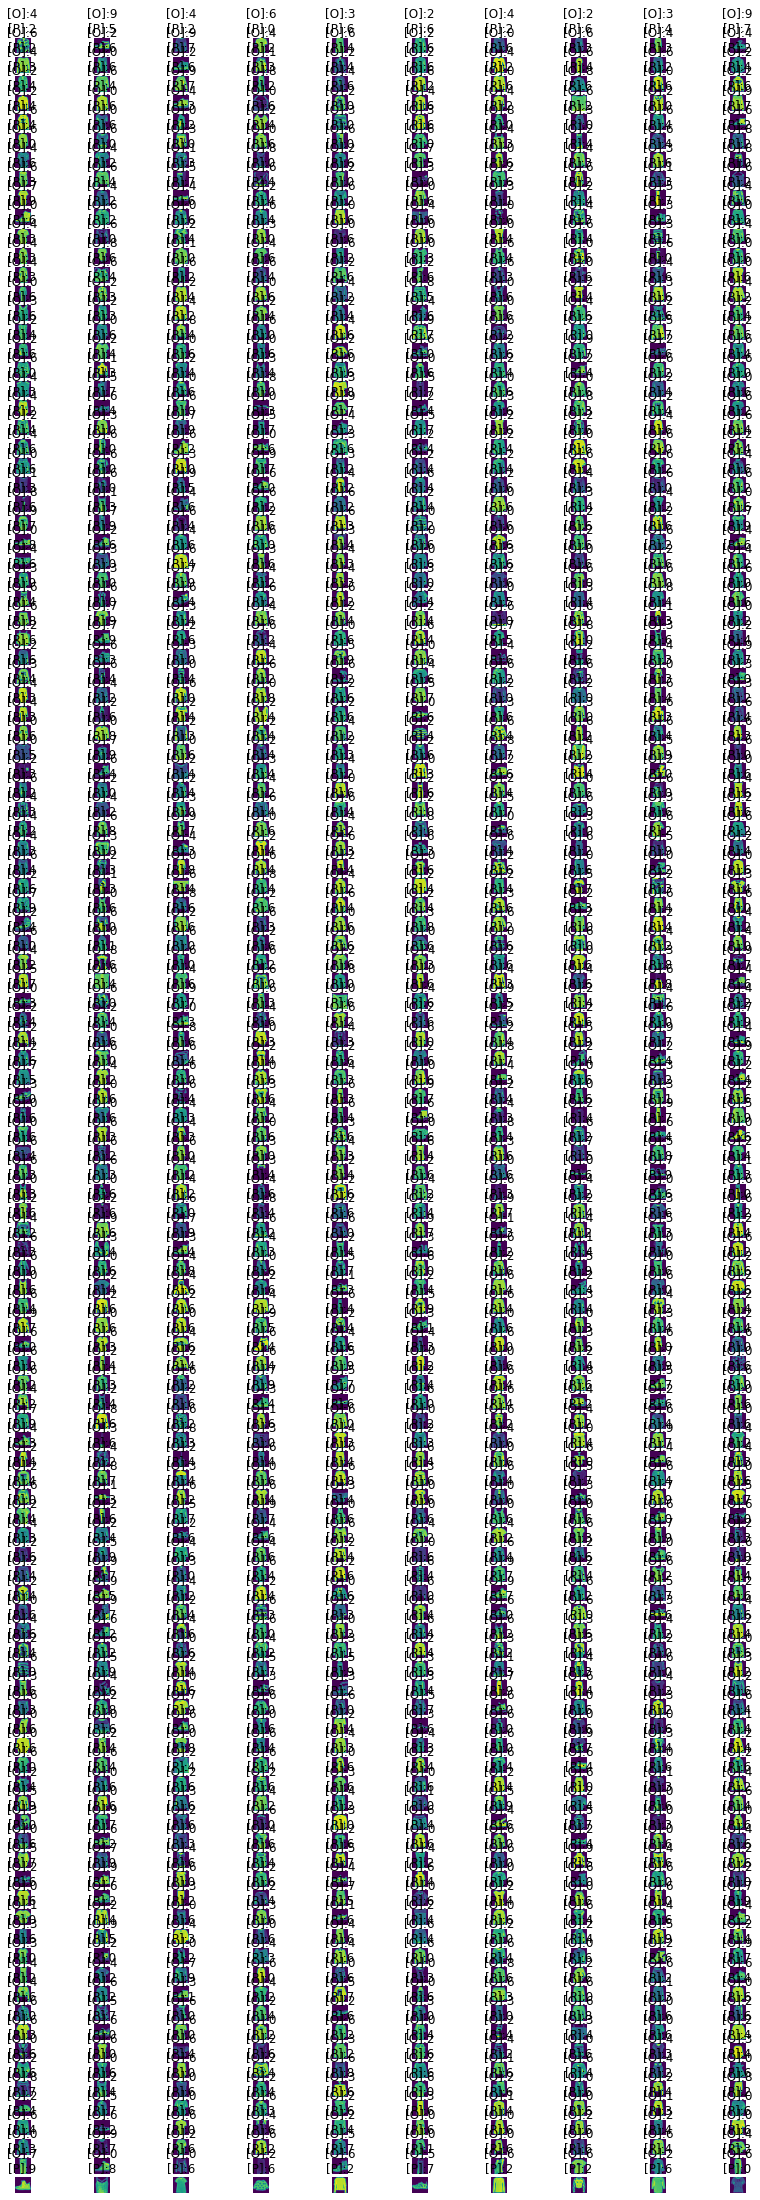

In [92]:
# subplot(total height, total weight, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 40))
width = 16
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

檔名125.jpg
0 的機率是: 0.0
1 的機率是: 0.0
2 的機率是: 0.0
3 的機率是: 0.0
4 的機率是: 0.0
5 的機率是: 0.0
6 的機率是: 0.0
7 的機率是: 0.0
8 的機率是: 1.0
9 的機率是: 0.0


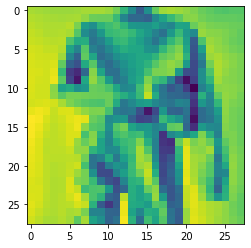

In [93]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(i, "的機率是:", round(p, 3))
plt.imshow(img_np)